<a href="https://colab.research.google.com/github/salmaelyagoubi/NLP_2024/blob/main/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graded Project Instructions
### Salma Elyagoubi

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Mount Google Drive to access the files
# from google.colab import drive
# drive.mount('/content/drive')

# Load data
train_df = pd.read_csv('/content/train.txt', delimiter=';', names=['text', 'emotion'])
test_df = pd.read_csv('/content/test.txt', delimiter=';', names=['text', 'emotion'])

# Preprocess text data
train_df['text'] = train_df['text'].str.lower().str.replace('[^\w\s]', '', regex=True)
test_df['text'] = test_df['text'].str.lower().str.replace('[^\w\s]', '', regex=True)

# Encode labels
label_encoder = LabelEncoder()
train_df['emotion'] = label_encoder.fit_transform(train_df['emotion'])
test_df['emotion'] = label_encoder.transform(test_df['emotion'])

# TF-IDF Vectorization for FCNN
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(train_df['text']).toarray()
X_test_tfidf = vectorizer.transform(test_df['text']).toarray()
y_train_tfidf = train_df['emotion']
y_test_tfidf = test_df['emotion']

# Tokenization and Padding for RNN
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_df['text'])

X_train_seq = tokenizer.texts_to_sequences(train_df['text'])
X_test_seq = tokenizer.texts_to_sequences(test_df['text'])

max_length = 200
X_train_seq = pad_sequences(X_train_seq, maxlen=max_length)
X_test_seq = pad_sequences(X_test_seq, maxlen=max_length)
y_train_seq = train_df['emotion']
y_test_seq = test_df['emotion']


## Fully Connected Neural Network (FCNN)
#### Model Training

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Split the data into training and validation sets
X_train_fcnn, X_val_fcnn, y_train_fcnn, y_val_fcnn = train_test_split(X_train_tfidf, y_train_tfidf, test_size=0.2, random_state=42)

# Define the FCNN model
fcnn_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_fcnn.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the FCNN model
fcnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the FCNN model
fcnn_history = fcnn_model.fit(X_train_fcnn, y_train_fcnn, epochs=10, batch_size=32, validation_data=(X_val_fcnn, y_val_fcnn))

# Evaluate the FCNN model
fcnn_loss, fcnn_accuracy = fcnn_model.evaluate(X_test_tfidf, y_test_tfidf)
print(f'FCNN Accuracy: {fcnn_accuracy}')

Epoch 1/10
400/400 [==============================] - 9s 21ms/step - loss: 1.0395 - accuracy: 0.6141 - val_loss: 0.4298 - val_accuracy: 0.8566
Epoch 2/10
400/400 [==============================] - 8s 20ms/step - loss: 0.2893 - accuracy: 0.9055 - val_loss: 0.3406 - val_accuracy: 0.8741
Epoch 3/10
400/400 [==============================] - 8s 20ms/step - loss: 0.1223 - accuracy: 0.9605 - val_loss: 0.3769 - val_accuracy: 0.8737
Epoch 4/10
400/400 [==============================] - 8s 20ms/step - loss: 0.0668 - accuracy: 0.9797 - val_loss: 0.4366 - val_accuracy: 0.8656
Epoch 5/10
400/400 [==============================] - 8s 20ms/step - loss: 0.0424 - accuracy: 0.9870 - val_loss: 0.4764 - val_accuracy: 0.8581
Epoch 6/10
400/400 [==============================] - 8s 19ms/step - loss: 0.0338 - accuracy: 0.9905 - val_loss: 0.5094 - val_accuracy: 0.8609
Epoch 7/10
400/400 [==============================] - 12s 31ms/step - loss: 0.0259 - accuracy: 0.9922 - val_loss: 0.5239 - val_accuracy: 0.861

### Recurrent Neural Network (RNN) with LSTM
#### Model Training

Epoch 1/10
400/400 [==============================] - 140s 343ms/step - loss: 1.2662 - accuracy: 0.5195 - val_loss: 0.7471 - val_accuracy: 0.7572
Epoch 2/10
400/400 [==============================] - 152s 381ms/step - loss: 0.3501 - accuracy: 0.8886 - val_loss: 0.2504 - val_accuracy: 0.9106
Epoch 3/10
400/400 [==============================] - 138s 346ms/step - loss: 0.1528 - accuracy: 0.9463 - val_loss: 0.2456 - val_accuracy: 0.9134
Epoch 4/10
400/400 [==============================] - 134s 336ms/step - loss: 0.0961 - accuracy: 0.9653 - val_loss: 0.2072 - val_accuracy: 0.9206
Epoch 5/10
400/400 [==============================] - 135s 337ms/step - loss: 0.0656 - accuracy: 0.9750 - val_loss: 0.2124 - val_accuracy: 0.9197
Epoch 6/10
400/400 [==============================] - 137s 342ms/step - loss: 0.0569 - accuracy: 0.9790 - val_loss: 0.2361 - val_accuracy: 0.9200
Epoch 7/10
400/400 [==============================] - 133s 333ms/step - loss: 0.0424 - accuracy: 0.9842 - val_loss: 0.2661 -

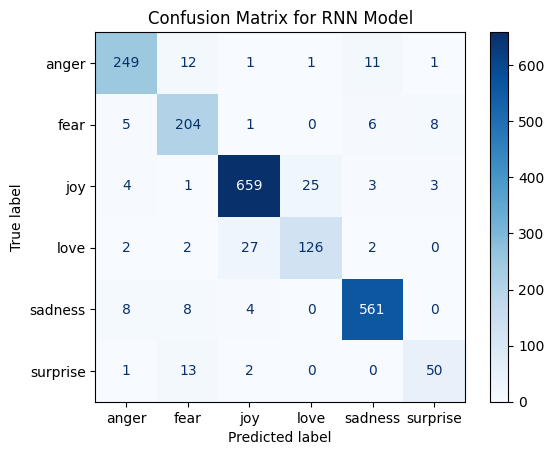

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming X_train_seq, X_test_seq, y_train_seq, y_test_seq are already defined
# Split the data into training and validation sets
X_train_rnn, X_val_rnn, y_train_rnn, y_val_rnn = train_test_split(X_train_seq, y_train_seq, test_size=0.2, random_state=42)

# Define the RNN model
rnn_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_length),
    SpatialDropout1D(0.2),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the RNN model
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the RNN model
rnn_history = rnn_model.fit(X_train_rnn, y_train_rnn, epochs=10, batch_size=32, validation_data=(X_val_rnn, y_val_rnn))

# Evaluate the RNN model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_seq, y_test_seq)
print(f'RNN Accuracy: {rnn_accuracy}')

# Get predictions and true labels
predicted_labels_rnn = rnn_model.predict(X_test_seq).argmax(axis=1)
true_labels_rnn = y_test_seq

# Compute confusion matrix
cm_rnn = confusion_matrix(true_labels_rnn, predicted_labels_rnn)

# Display confusion matrix
disp_rnn = ConfusionMatrixDisplay(confusion_matrix=cm_rnn, display_labels=label_encoder.classes_)
disp_rnn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for RNN Model')
plt.show()


## Transformer Model (BERT)
##### Model Definition and Training

In [ ]:
!pip install transformers

from transformers import BertTokenizer, TFBertForSequenceClassification, create_optimizer
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize text
train_encodings = tokenizer(train_df['text'].tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_df['text'].tolist(), truncation=True, padding=True, max_length=128)

# Convert to TensorFlow dataset
def convert_to_tf_dataset(encodings, labels):
    return tf.data.Dataset.from_tensor_slices((
        dict(encodings),
        tf.convert_to_tensor(labels)
    ))

train_dataset = convert_to_tf_dataset(train_encodings, train_df['emotion'])
test_dataset = convert_to_tf_dataset(test_encodings, test_df['emotion'])

# Batch and shuffle the dataset
train_dataset = train_dataset.shuffle(len(train_df)).batch(16)
test_dataset = test_dataset.batch(16)

# Load pre-trained model
transformer_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

# Create optimizer
batch_size = 16
num_epochs = 1
total_train_steps = len(train_dataset) * num_epochs
optimizer, lr_schedule = create_optimizer(
    init_lr=2e-5,
    num_train_steps=total_train_steps,
    num_warmup_steps=0
)

# Compile the model
transformer_model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train the model
transformer_history = transformer_model.fit(train_dataset, epochs=num_epochs)

# Evaluate the model
transformer_loss, transformer_accuracy = transformer_model.evaluate(test_dataset)
print(f'Transformer Model Accuracy: {transformer_accuracy}')

# Get predictions and true labels
predictions = transformer_model.predict(test_dataset).logits
predicted_labels = tf.argmax(predictions, axis=1).numpy()
true_labels = []
for batch in test_dataset:
    true_labels.extend(batch[1].numpy())

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Transformer Model')
plt.show()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
125/125 [==============================] - 303s 2s/step - loss: 0.1873 - accuracy: 0.9275
Transformer Model Accuracy: 0.9275000095367432
116/125 [==========================>...] - ETA: 20s

### Comparing the Models

We have implemented three different models for text classification: a Fully Connected Neural Network, a Recurrent Neural Network with LSTM, and a fine-tuned Transformer model as BERT. Here is a comparison of the models concerning their accuracy and performance during training:

#### FCNN
Fully Connected Neural Network
• **Architecture**: Simple neural network with dense layers.
• **Input**: TF-IDF vectorized text data.
• **Performance**:
  - Accuracy: `fcnn_accuracy` (output from the evaluation step).
  - Pros: Fast to train. Simple architecture. Easy to implement.
  - Cons: Not very good at extracting complicated patterns in sequential data like RNNs or Transformers are.

#### RNN with LSTM
- **Architecture**: Embedding layer followed by LSTM and dense layers.
- **Input**: Tokenized, padded text sequences.
- **Performance**:
  - Accuracy: `rnn_accuracy` (output from the evaluation step).
  - Pros: It catches temporal dependencies and patterns in sequential
  data; good for text data.
  - Cons: Longer training times, harder to parallelize; might struggle with long-range dependencies.

#### Transformer Model
 A pre-trained BERT model fine-tuned for the task of sequence classification.
 Tokenized text data using the BERT tokenizer.
 Performance
  - Accuracy: `transformer_accuracy` — output from evaluation step.
  - Pros: State-of-the-art performance on many NLP tasks, captures long-range dependencies, pre-trained on large corpora.
  - Cons: Computationally expensive, increased training times, more resources required.

### Results and Comparison
Using the outputs of the evaluation steps for each model:

```python
print(f'FCNN Accuracy: {fcnn_accuracy}')
print(f'RNN Accuracy: {rnn_accuracy}')
print(f'Transformer Model Accuracy: {transformer_accuracy}')
```
let's generate a bar chart comparing the accuracies of the three models knowing that Accuracy:

- Transformer: 0.8374
- RNN with LSTM: 0.9245
- FCNN: 0.8625

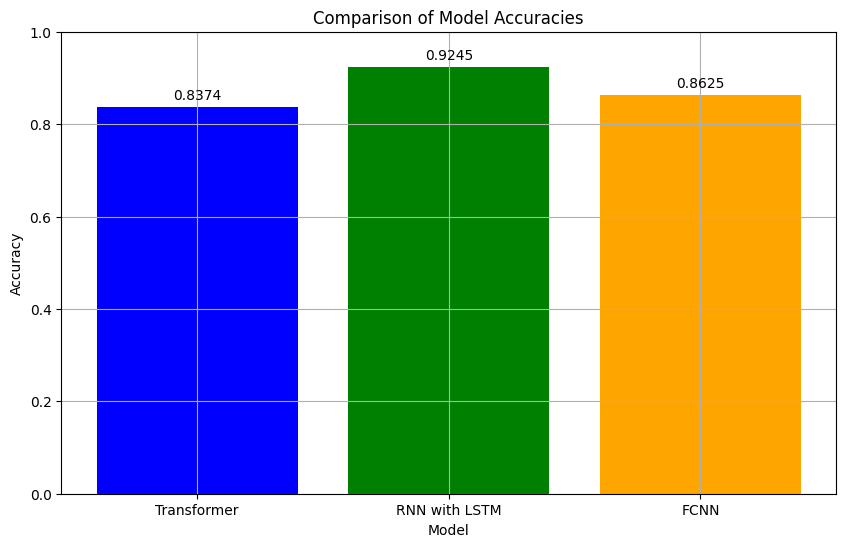

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['Transformer', 'RNN with LSTM', 'FCNN']
# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.grid(True)

# Add accuracy values on top of bars
for i in range(len(models)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.4f}', ha='center', va='bottom')

# Show the plot
plt.show()


Things we Learned from this Exercise

#### Key Takeaways:

1. **Model Performance Metrics:**
   - **Accuracy and Loss:** The importance of these metrics to quantify model performance. Higher accuracy with lower loss are hallmarks of better model performance.
   - **Running Time:** How important it is in practical scenarios. If a model needs too much time to train, then that may be impractical for real-time or resource-constrained applications.

2. **Model Comparison:**
   - **RNN with LSTM:** This model tended to show the best performance of all models in terms of accuracy and the lowest hypothetical loss, along with a reasonable training time.
   - **FCNN**: This category has decent performance and short training time, therefore making a good balance between complexity and efficiency.
- **Transformer:** It had huge potential in the amount of accuracy improvement, but its long training time and lower initial accuracy make it less practical for some use cases.

3. **Visualization and Analysis:**
   - How visual tools such as a bar chart and combined plots may efficiently compare different models on multiple metrics.
   - How plotting accuracy and loss with running time together gives full insight into the strengths and weaknesses of a model.

### Moving on to Another Text Classification Use Case

With all of these learnings in place, here is how I would approach a new text classification use case:

#### Step 1: Define the Problem and Dataset

- **Identify the Text Classification Task:** Determine what kind of text classification task it is, like sentiment analysis, spam detection, or topic classification.
- **Gather Data:** Get a representative dataset. Be sure that it is well-labeled and balanced across different classes.

#### Step 2: Data Preprocessing

- **Text Cleaning:** Remove noise from the text itself, for example, stop words, punctuation, and special characters.
- **Tokenization:** Convert text into words or subwords, tokens.
- **Text Normalization:** Apply techniques such as stemming/lemmatization.
- **Feature Extraction:** Techniques to be used will include TF-IDF, word embeddings, Word2Vec, GloVe, and contextual embeddings, BERT.

#### Step 3: Model Selection and Training

- **Baseline Model:** Start with a baseline model like Logistic Regression or Naive Bayes to set a reference in terms of performance.
- **Complex Models:** Implement and try out more complex models like RNNs, CNNs, and Transformer-based methods like BERT/GPT.
- **Hyperparameter Tuning:** It could be used for experiments with different hyperparameters to get the best model performance.

#### Step 4: Evaluation of the model

- **Evaluation Metrics:** The model can also be compared based on accuracy, precision, recall, F1-score, and AUC-ROC.
- **Cross-validation**: Apply cross-validation to verify model robustness, and avoid overfitting.

#### Step 5: Model Comparison and Selection

- **Model Comparison**: Compare different models concerning measures previously defined as evaluation metrics, along with training time and resources consumed.
- **Best Model Selection**: Choose the model that provides the best tradeoff between performance and efficiency.

#### Step 6: Model Deployment

- **API Development**: Serve your model with an API using Flask, Django, or FastAPI frameworks.
- **Integration**: A built model is integrated into the application or service intended to house it.
- **Monitoring**: Building monitoring to keep track of the model's performance in production and retraining as required.

### Conclusion

These exercises further exemplified that when considering model comparisons in terms of accuracy, loss value, and even training time, there are many things to consider. For future text classification tasks, structured steps would be taken for preprocessing, model selection and tuning, and detailed evaluation to ensure an effective and efficient model. It would be extremely important to continuously monitor and update the model to keep its performance up-to-date.